In [107]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

## Загрузим и посмотрим на данные

In [47]:
inter = pd.read_csv(
    '../../datasets/ml-1m/ml-1m.inter',
    sep='\t',
    header=0,
    names=['user_id', 'item_id', 'rating', 'timestamp']
)
items = pd.read_csv(
    '../../datasets/ml-1m/ml-1m.item',
    sep='\t',
    header=0,
    names=['item_id', 'movie_title', 'release_year', 'genre']
)
users = pd.read_csv(
    '../../datasets/ml-1m/ml-1m.user',
    sep='\t',
    header=0,
    names=['user_id', 'gender', 'age', 'occupation', 'zip_code']
)

In [6]:
inter.head()

,user_id,item_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [7]:
items.head()

,item_id,movie_title,release_year,genre
0,1,Toy Story,1995,Animation Children's Comedy
1,2,Jumanji,1995,Adventure Children's Fantasy
2,3,Grumpier Old Men,1995,Comedy Romance
3,4,Waiting to Exhale,1995,Comedy Drama
4,5,Father of the Bride Part II,1995,Comedy


In [48]:
users.head()

,user_id,gender,age,occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [9]:
inter.describe()

,user_id,item_id,rating,timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


Проверим, что один пользователь не мог оценить один фильм более одного раза

In [10]:
inter.groupby(['user_id', 'item_id']).filter(lambda x: len(x) > 1)

,user_id,item_id,rating,timestamp


Посчитаем сколько каждый пользователь сделал оценок

In [90]:
user_inters = inter.groupby('user_id').agg(count=('item_id', 'count'))

In [36]:
user_inters.head()

,count
user_id,
1,53
2,129
3,51
4,21
5,198


In [152]:
sorted_user_inters = user_inters.sort_values('count', ascending=False)
sorted_user_inters

,count
user_id,
4169,2314
1680,1850
4277,1743
1941,1595
1181,1521
...,...
5725,20
3407,20
1664,20


Видим, что каждый пользователь сделал минимум 20 оценок

In [52]:
sorted_user_inters.merge(users, on='user_id').head(10)

,user_id,count,gender,age,occupation,zip_code
0,4169,2314,M,50,0,66048
1,1680,1850,M,25,20,95380
2,4277,1743,M,35,16,98133
3,1941,1595,M,35,17,94550
4,1181,1521,M,35,7,20716
5,889,1518,M,45,20,10024
6,3618,1344,M,56,17,22657
7,2063,1323,M,25,4,43138
8,1150,1302,F,25,20,75226
9,1015,1286,M,35,3,11220


Чаще всего оценки ставят мужчины в возрасте от 25 до 56 лет

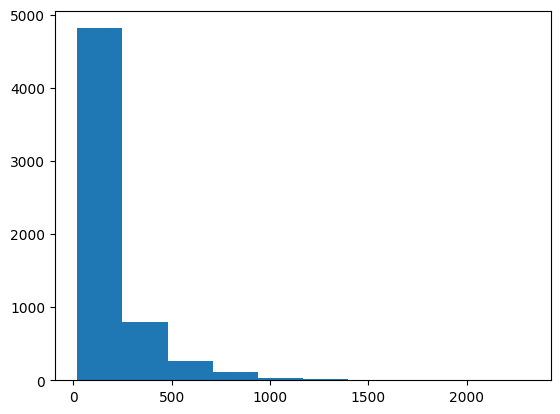

In [38]:
plt.hist(user_inters)
plt.show()

Также наблюдается перекос в сторону более активных пользователей, имеем длинный хвост пользователей, которые делают мало оценок

Посмотрим какие фильмы оценивают чаще

In [153]:
item_inters = inter.groupby('item_id').agg(rating_count=('rating', 'count'))
item_inters.sort_values('rating_count', ascending=False).head()

,rating_count
item_id,
2858,3428
260,2991
1196,2990
1210,2883
480,2672


Топ 10 самых оцениваемых фильмов:

In [154]:
item_inters.merge(items, on='item_id').sort_values('rating_count', ascending=False).reset_index().head(10)

,index,item_id,rating_count,movie_title,release_year,genre
0,2651,2858,3428,American Beauty,1999,Comedy Drama
1,253,260,2991,Star Wars: Episode IV - A New Hope,1977,Action Adventure Fantasy Sci-Fi
2,1106,1196,2990,Star Wars: Episode V - The Empire Strikes Back,1980,Action Adventure Drama Sci-Fi War
3,1120,1210,2883,Star Wars: Episode VI - Return of the Jedi,1983,Action Adventure Romance Sci-Fi War
4,466,480,2672,Jurassic Park,1993,Action Adventure Sci-Fi
5,1848,2028,2653,Saving Private Ryan,1998,Action Drama War
6,575,589,2649,Terminator 2: Judgment Day,1991,Action Sci-Fi Thriller
7,2374,2571,2590,"Matrix, The",1999,Action Sci-Fi Thriller
8,1178,1270,2583,Back to the Future,1985,Comedy Sci-Fi
9,579,593,2578,"Silence of the Lambs, The",1991,Drama Thriller


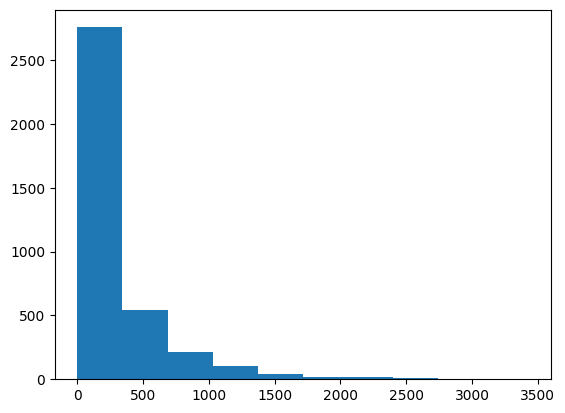

In [43]:
plt.hist(item_inters)
plt.show()

Так же наблюдаем, что часть фильмов оценивают чаще, чем другие

## Разделение на train/test/val

Реализуем следующие стратегии разделения:

1. Random split
2. User split
3. Leave One Last (Item/Basket)
4. Temporal User/Global split

### Random split

Плюсы: просто и быстро

Минусы: в тестовой и валидационной части могут появиться пользователи, о которых модель ничего не будет знать, плохо для моделей не поддерживающих холодный старт

In [65]:
X_train_rnd, X_test_val = train_test_split(inter, test_size=0.2, random_state=42)
X_test_rnd, X_val_rnd = train_test_split(X_test_val, test_size=0.5, random_state=42)

In [71]:
X_train_rnd.describe()

,user_id,item_id,rating,timestamp
count,800167.000000,800167.000000,800167.000000,8.001670e+05
mean,3025.006127,1865.352321,3.581347,9.722412e+08
std,1728.166213,1095.500805,1.116444,1.215108e+07
min,1.000000,1.000000,1.000000,9.567039e+08
25%,1509.000000,1030.000000,3.000000,9.653026e+08
50%,3072.000000,1834.000000,4.000000,9.729734e+08
75%,4477.000000,2770.000000,4.000000,9.752205e+08
max,6040.000000,3952.000000,5.000000,1.046455e+09


In [72]:
X_test_rnd.describe()

,user_id,item_id,rating,timestamp
count,100021.00000,100021.000000,100021.000000,1.000210e+05
mean,3023.52162,1868.432669,3.583487,9.722155e+08
std,1732.31396,1100.056154,1.120611,1.209097e+07
min,1.00000,1.000000,1.000000,9.567040e+08
25%,1498.00000,1028.000000,3.000000,9.652835e+08
50%,3067.00000,1856.000000,4.000000,9.730556e+08
75%,4480.00000,2788.000000,4.000000,9.752222e+08
max,6040.00000,3952.000000,5.000000,1.046455e+09


In [73]:
X_val_rnd.describe()

,user_id,item_id,rating,timestamp
count,100021.000000,100021.000000,100021.000000,1.000210e+05
mean,3021.552844,1864.147739,3.581378,9.722920e+08
std,1726.491585,1096.341998,1.118856,1.222561e+07
min,1.000000,1.000000,1.000000,9.567041e+08
25%,1503.000000,1028.000000,3.000000,9.653064e+08
50%,3065.000000,1833.000000,4.000000,9.730564e+08
75%,4469.000000,2770.000000,4.000000,9.752300e+08
max,6040.000000,3952.000000,5.000000,1.046454e+09


### User split

Плюсы: просто и быстро

Минусы: не пригодно для моделей не поддерживающих холодный старт

In [75]:
U_train, U_test_val = train_test_split(users['user_id'], test_size=0.2, random_state=42)
U_test, U_val = train_test_split(U_test_val, test_size=0.5, random_state=42)

In [78]:
X_train_u = inter[inter['user_id'].isin(U_train)]
X_test_u = inter[inter['user_id'].isin(U_test)]
X_val_u = inter[inter['user_id'].isin(U_val)]

In [84]:
X_train_u.describe()

,user_id,item_id,rating,timestamp
count,808218.000000,808218.000000,808218.000000,8.082180e+05
mean,3046.953265,1865.808888,3.580702,9.721933e+08
std,1716.633036,1095.983519,1.118686,1.201677e+07
min,1.000000,1.000000,1.000000,9.567039e+08
25%,1579.000000,1030.000000,3.000000,9.653086e+08
50%,3129.000000,1836.000000,4.000000,9.727010e+08
75%,4482.000000,2770.000000,4.000000,9.751945e+08
max,6040.000000,3952.000000,5.000000,1.046445e+09


In [85]:
X_test_u.describe()

,user_id,item_id,rating,timestamp
count,97898.000000,97898.000000,97898.000000,9.789800e+04
mean,2994.893072,1860.838342,3.586835,9.724497e+08
std,1817.759002,1094.001207,1.117454,1.343823e+07
min,15.000000,1.000000,1.000000,9.567068e+08
25%,1303.000000,1025.000000,3.000000,9.651577e+08
50%,3003.000000,1821.000000,4.000000,9.734340e+08
75%,4591.000000,2763.000000,4.000000,9.755284e+08
max,6038.000000,3952.000000,5.000000,1.046455e+09


In [86]:
X_val_u.describe()

,user_id,item_id,rating,timestamp
count,94093.000000,94093.000000,94093.000000,9.409300e+04
mean,2862.571658,1868.121072,3.583487,9.724620e+08
std,1724.801680,1098.646468,1.103020,1.189676e+07
min,9.000000,1.000000,1.000000,9.567108e+08
25%,1472.000000,1032.000000,3.000000,9.653383e+08
50%,2793.000000,1831.000000,4.000000,9.738779e+08
75%,4344.000000,2791.000000,4.000000,9.753795e+08
max,6035.000000,3952.000000,5.000000,1.046326e+09


### Leave One Last Item

Плюсы: будем предсказывать для пользователей о которых уже что-то знаем

Минусы: есть проблемы, что для некоторых пользователей модель может "подсмотреть в будущее" на этапе обучения.

Так как нам нужно рекомендовать что-то релевантное, то будем отбирать только фильмы с хорошим рейтингом, но перед этим нужно отнормировать рейтинги.

In [122]:
groupper = inter.groupby('user_id')['rating']
inter['norm_rating'] = (inter['rating'] - groupper.transform('min')) / (groupper.transform('max') - groupper.transform('min'))

In [129]:
inter.head()

,user_id,item_id,rating,timestamp,norm_rating
0,1,1193,5,978300760,1.0
1,1,661,3,978302109,0.0
2,1,914,3,978301968,0.0
3,1,3408,4,978300275,0.5
4,1,2355,5,978824291,1.0


In [141]:
inter['rn'] = inter.groupby('user_id')['timestamp'].rank(method="first", ascending=False)

In [161]:
X_train_lol = inter[(inter['rn'] > 2) & (inter['norm_rating'] > 0.5)]
X_test_lol = inter[(inter['rn'] == 1) & (inter['norm_rating'] > 0.5)]
X_val_lol = inter[(inter['rn'] == 2) & (inter['norm_rating'] > 0.5)]


In [162]:
X_train_lol.head()

,user_id,item_id,rating,timestamp,norm_rating,rn
0,1,1193,5,978300760,1.0,42.0
4,1,2355,5,978824291,1.0,4.0
6,1,1287,5,978302039,1.0,26.0
7,1,2804,5,978300719,1.0,45.0
10,1,595,5,978824268,1.0,7.0


In [163]:
X_test_lol.head()

,user_id,item_id,rating,timestamp,norm_rating,rn
25,1,48,5,978824351,1.00,1.0
232,3,2081,4,978298504,0.75,1.0
235,4,2951,4,978294282,0.75,1.0
475,6,597,5,978239019,1.00,1.0
983,10,2252,5,980638688,1.00,1.0


In [164]:
X_val_lol.head()

,user_id,item_id,rating,timestamp,norm_rating,rn
187,3,104,4,978298486,0.750000,2.0
237,4,1036,4,978294282,0.750000,2.0
480,6,1569,4,978238948,0.750000,2.0
610,8,741,5,978233526,1.000000,2.0
741,9,2294,4,978226678,0.666667,2.0


### Temporal User/Global split

In [160]:
inter

,user_id,item_id,rating,timestamp,norm_rating,rn
0,1,1193,5,978300760,1.00,42.0
1,1,661,3,978302109,0.00,23.0
2,1,914,3,978301968,0.00,28.0
3,1,3408,4,978300275,0.50,47.0
4,1,2355,5,978824291,1.00,4.0
...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,0.00,161.0
1000205,6040,1094,5,956704887,1.00,293.0
1000206,6040,562,5,956704746,1.00,305.0
1000207,6040,1096,4,956715648,0.75,234.0


In [ ]:
groupper = inter.groupby('user_id')['rating']
inter['norm_rating'] = (inter['rating'] - groupper.transform('min')) / (groupper.transform('max') - groupper.transform('min'))

In [169]:
groupper = inter.groupby('user_id')['rn']
(inter['rn'] - groupper.transform('min')) / (groupper.transform('max') - groupper.transform('min'))

0          0.788462
1          0.423077
2          0.519231
3          0.884615
4          0.057692
             ...   
1000204    0.470588
1000205    0.858824
1000206    0.894118
1000207    0.685294
1000208    0.720588
Name: rn, Length: 1000209, dtype: float64

In [172]:
groupper.max()

user_id
1        53.0
2       129.0
3        51.0
4        21.0
5       198.0
        ...  
6036    888.0
6037    202.0
6038     20.0
6039    123.0
6040    341.0
Name: rn, Length: 6040, dtype: float64

In [176]:
groupper.transform(lambda x: x.quantile(0.8))

0           42.6
1           42.6
2           42.6
3           42.6
4           42.6
           ...  
1000204    273.0
1000205    273.0
1000206    273.0
1000207    273.0
1000208    273.0
Name: rn, Length: 1000209, dtype: float64

In [177]:
groupper = inter.groupby('user_id')['rn']
q80 = groupper.transform(lambda x: x.quantile(0.8))
q90 = groupper.transform(lambda x: x.quantile(0.9))
X_train_tu = inter[inter['rn'] < q80]
X_test_tu = inter[inter['rn'] >= q90]
X_val_tu = inter[(inter['rn'] >= q80) & (inter['rn'] < q90)]

In [185]:
X_train_tu.head()

,user_id,item_id,rating,timestamp,norm_rating,rn
0,1,1193,5,978300760,1.0,42.0
1,1,661,3,978302109,0.0,23.0
2,1,914,3,978301968,0.0,28.0
4,1,2355,5,978824291,1.0,4.0
5,1,1197,3,978302268,0.0,15.0


In [183]:
X_test_tu

,user_id,item_id,rating,timestamp,norm_rating,rn
22,1,1270,5,978300055,1.00,50.0
24,1,2340,3,978300103,0.00,49.0
27,1,1721,4,978300055,0.50,51.0
31,1,3186,4,978300019,0.50,53.0
36,1,1836,5,978300172,1.00,48.0
...,...,...,...,...,...,...
1000163,6040,150,3,956704716,0.50,309.0
1000179,6040,2762,4,956704584,0.75,315.0
1000186,6040,527,5,956704219,1.00,327.0
1000192,6040,2019,5,956703977,1.00,338.0


In [184]:
X_val_tu

,user_id,item_id,rating,timestamp,norm_rating,rn
3,1,3408,4,978300275,0.50,47.0
7,1,2804,5,978300719,1.00,45.0
21,1,720,3,978300760,0.00,43.0
44,1,260,4,978300760,0.50,44.0
47,1,1207,4,978300719,0.50,46.0
...,...,...,...,...,...,...
1000196,6040,549,4,956704746,0.75,304.0
1000197,6040,2020,3,956715288,0.50,276.0
1000202,6040,1089,4,956704996,0.75,286.0
1000205,6040,1094,5,956704887,1.00,293.0
